---
title: "Lecture 12: Chapter 4 - Integration"
format:
  html:
    toc: true
    html-math-method: katex
    smooth-scroll: true
---

<div style='background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;'><strong>Note.</strong>  These notes are mainly a record of what we discussed and are not a substitute for attending the lectures and reading books! If anything is unclear/wrong, let me know and I will update the notes.
 </div> 

In [1]:
include("preamble.jl")

✓ file included! 

using: Plots, LaTeXStrings, Polynomials, PrettyTables 

Functions included: 
    simple_iteration, 
    Newton, 
    orderOfConvergence, 
    ChebyshevNodes 

Use @doc <<function>> for help


We wish to consider *quadrature rules* of the following form:

\begin{align}
    \int_{a}^b f &\approx \sum_j w_j f(x_j). 
\end{align}

We call $\{w_j\}$ the *quadrature weights*, $\{x_j\}$ the *quadrature nodes* and $(\{w_j\}, \{x_j\})$ or $\sum_{j} w_j f(x_j)$ a *quadrature rule*.

Suppose $p$ is the polynomial of degree at most $n$ interpolating $f$ on $X = \{x_0,\dots,x_n \}$: that is $p(x) = \sum_{j=0}^n \ell_j(x) f(x_j)$. We simply approximate the integral of $f$ by instead integrating $p$:

\begin{align}
    \int_{a}^b f &\approx \int_a^b p = \sum_{j=0}^n \Big[\int_a^b\ell_j(x)\mathrm{d}x \Big] f(x_j) 
\end{align}

which gives a quadrature rule with weights $w_j := \int_a^b\ell_j(x)\mathrm{d}x$ and nodes $x_j$. When the interpolation nodes are equispaced, this is a *Newton-Cotes* quadrature rule: 

# Newton-Cotes Quadrature

In the following, we will consider the example of integrating $f(x) = \tfrac1{2\pi} ( x + x \sin x)$ between $0$ and $2\pi$. In this particular case, the integral is $\pi-1$. We use this example so that we can analyse the error committed in the methods we will introduce. 

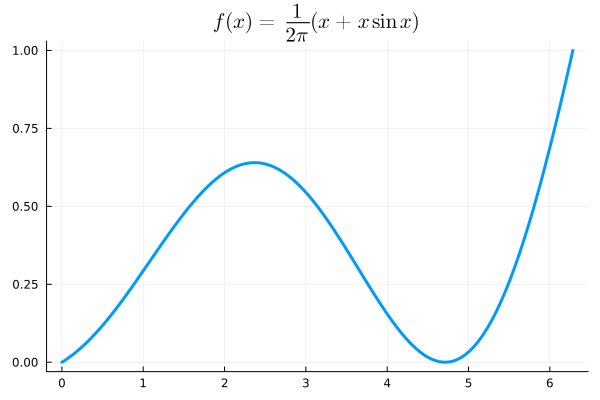

In [2]:
a, b = 0, 2π
f = x -> x * ( 1 + sin(x) ) /( 2π )
df_max = 1 + 1/(2π)
d2f_max = 5.17
d3f_max = 2π
d4f_max = 6.19
plot( f, a, b, title=L"f(x) = \frac{1}{2\pi} (x + x\sin x ) ", lw = 3, legend=false)

## Rectangular rule

The simplest rule of this kind is taking $X = \{a\}$ and considering the polynomial interpolation of degree $0$: $p_0(x) = f(a)$,

\begin{align}
    \int_a^b f(x) \approx \int_a^b p_0(x) = (b-a) f(a).
\end{align}

The rule has weights $\{ b-a \}$ and nodes $\{ a \}$. Notice that this rule is exact if $f$ is a polynomial of degree $0$.

***Error Estimate.*** Since $p_0$ is a degree zero interpolating polynomial, we may apply the error bound we had for interpolation: 

\begin{align}
    f(x) - p_0(x) = f'(\xi_x) (x - a) 
\end{align}

for some $\xi_x \in [a, x]$ (in this case, this is just the mean value theorem). Therefore, integrating this over $[a,b]$, we have the bound

\begin{align}
    \left| \int_{a}^b \big[ f(x) - p_0(x) \big] \mathrm{d}x \right| 
    %
    &\leq \| f'\|_{L^\infty([a,b])} \int_a^b |x - a| \mathrm{d}x \nonumber\\
    &\leq \| f'\|_{L^\infty([a,b])} \int_{0}^{b-a} t \mathrm{d}x = \| f'\|_{L^\infty([a,b])} \frac{(b-a)^2}{2}.
\end{align}

***Composite Rule.*** This error bound is only useful if $[a,b]$ is a small interval (or $f'$ is small). It therefore makes sense to split the interval $[a,b]$ into $n$ subintervals and consider the rectangular rule on each one: consider $x_j = a + j\frac{b-a}{n}$ for $j = 0,\dots,n$ and write

\begin{align}
    \int_a^b f &= \sum_{j=0}^{n-1} \int_{x_j}^{x_{j+1}} f \nonumber\\
    %
    &\approx \sum_{j=0}^{n-1} (x_{j+1} - x_j) f(x_j) 
\end{align}

This is a quadrature rule with weights $w_j = x_{j+1} - x_j = \frac{b-a}{n}$ and nodes $x_j$ for $j = 0,\dots,n-1$. Using the error estimate and summing over $j$, we obtain

\begin{align}
    \left| \int_a^b f - \sum_{j=0}^{n-1} \frac{b-a}{n} f(x_j) \right| &\leq  \| f'\|_{L^\infty([a,b])} \sum_{j=0}^{n-1} \frac12 \Big(\frac{b-a}{n}\Big)^2 \nonumber\\
    %
    &\leq   \frac{\| f'\|_{L^\infty([a,b])}}{2} \frac{ (b-a)^2 }{ n }  \nonumber\\
\end{align}

***Remark.*** Notice that this quadrature rule is exact if $f$ is a polynomial of degree $0$.

***Numerics.*** We now test this numerically:

[ Info: Saved animation to c:\Users\math5\Math 5485\Pictures\Rectangular.gif


Plots.AnimatedGif("c:\\Users\\math5\\Math 5485\\Pictures\\Rectangular.gif")
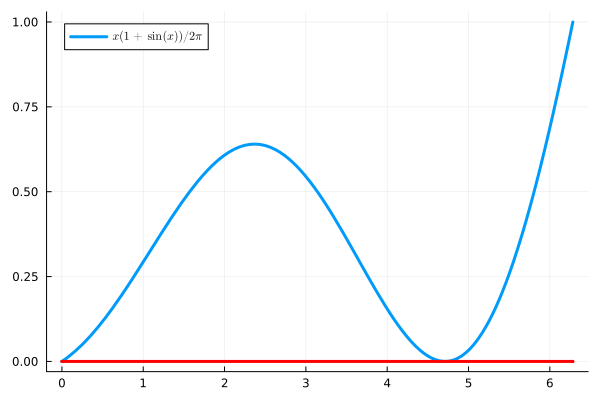

In [3]:
N = 50
R = []

anim = @animate for n ∈ 1:N
    
    h = (b-a)/n
    x = [a + j*(b-a)/n for j in 0:n]
    
    push!( R, sum( [ ( x[j+1] - x[j] ) * f( x[j] ) for j in 1:n] ) )
    
    plot( f, a, b, label=L"x( 1 + \sin(x) )/2π", lw = 3)

    push!(x, b)
    for m ∈ 1:n 
        plot!([x[m], x[m+1]], [f(x[m]), f(x[m])], lw=3, color="red", primary=false)
        plot!([x[m], x[m]], [0, f(x[m])], lw=3, color="red", primary=false)
        plot!([x[m+1], x[m+1]], [0, f(x[m])], lw=3, color="red", primary=false)
    end

end

gif(anim, "Pictures/Rectangular.gif", fps = 1)

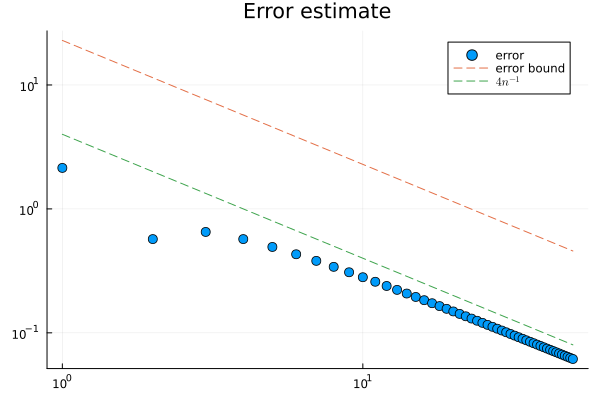

In [4]:
scatter( abs.(R .- (π -1)), xaxis=:log, yaxis=:log, markersize=5, label="error", title="Error estimate" )
plot!( (1/2)*df_max*(b-a)^2*(1:N).^(-1), linestyle=:dash,label="error bound" )

plot!( 4*(1:N).^(-1), linestyle=:dash, label=L"4n^{-1}" )

We can see here that the error decays with rate $O(n^{-1})$ and the error bound (proved above) is in fact an upper bound!

## Trapezoid Rule

The next simplest rule of this kind is taking $X = \{a, b\}$ and considering the polynomial interpolation of degree $1$: $p_1(x) = \frac{x-b}{a-b}f(a) + \frac{x-a}{b-a} f(b)$,

\begin{align}
    \int_a^b f(x) \approx \int_a^b p_1(x) = \frac{b-a}{2} \big( f(a) + f(b) \big).
\end{align}

(You can either go through the details in the integration, or draw a picture and calculate the area of the trapezium with points $(a,0), (a,f(a)), (b, f(b)), (b,0)$). This rule has weights $\{ \frac{b-a}{2}, \frac{b-a}{2} \}$ and nodes $\{ a, b \}$. Notice that this rule is exact if $f$ is a polynomial of degree $1$ (because $f$ agrees with $p_1$ in this case).

***Error Estimate.*** Since $p_1$ is a degree zero interpolating polynomial, we may apply the error bound we had for interpolation: 

\begin{align}
    f(x) - p_1(x) = \frac{f''(\xi_x)}{2} (x - a)(x-b) 
\end{align}

for some $\xi_x \in [a, b]$. Therefore, integrating this over $[a,b]$, we have the bound

\begin{align}
    \left| \int_{a}^b \big[ f(x) - p_1(x) \big] \mathrm{d}x \right| 
    %
    &\leq \frac{\| f''\|_{L^\infty([a,b])}}{2} \int_a^b |(x - a)(x-b)| \mathrm{d}x \nonumber\\
    &\leq \frac{\| f''\|_{L^\infty([a,b])}}{2} \frac{(b-a)^3}{6}.
\end{align}

***Composite Rule.*** This error bound is only useful if $[a,b]$ is a small interval (or $f''$ is small). It therefore makes sense to split the interval $[a,b]$ into $n$ subintervals and consider the trapezium rule on each one: consider $x_j = a + j\frac{b-a}{n}$ for $j = 0,\dots,n$ and write

\begin{align}
    \int_a^b f &= \sum_{j=0}^{n-1} \int_{x_j}^{x_{j+1}} f \nonumber\\
    %
    &\approx \sum_{j=0}^{n-1} \frac{x_{j+1} - x_j}{2} \big[ f(x_j) + f(x_{j+1}) \big]
\end{align}

This is a quadrature rule with weights $w_0 = w_n = \frac{x_{j+1} - x_j}{2} = \frac{b-a}{2n}$ and $w_j = \frac{b-a}{n}$ for $j=1,\dots,n-1$. Using the error estimate and summing over $j$, we obtain

\begin{align}
    \left| \int_a^b f - \frac{b-a}{n} \sum^\prime_{0 \leq j \leq n} f(x_j) \right| &\leq  \| f''\|_{L^\infty([a,b])} \sum_{j=0}^{n-1} \frac1{12} \left(\frac{b-a}{n}\right)^3 \nonumber\\
    %
    &\leq   \frac{\| f''\|_{L^\infty([a,b])}}{12} \frac{ (b-a)^3 }{ n^2 }  \nonumber\\
\end{align}

where $\sum^\prime$ indicates that the first and last terms must be multiplied by $\frac12$.

***Remark.*** Notice that this quadrature rule is exact if $f$ is a polynomial of degree $1$.

***Numerics.*** We now test this numerically:

[ Info: Saved animation to c:\Users\math5\Math 5485\Pictures\Trapezium.gif


Plots.AnimatedGif("c:\\Users\\math5\\Math 5485\\Pictures\\Trapezium.gif")
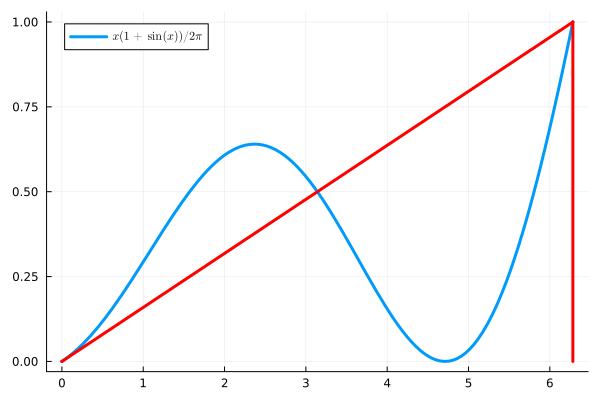

In [5]:
N = 30
T = []

anim = @animate for n ∈ 1:N
    
    h = (b-a)/n
    x = [a + j*(b-a)/n for j in 0:n]
    
    push!( T, sum( [ (1/2)*( x[j+1] - x[j] ) * ( f(x[j]) + f(x[j+1]) ) for j in 1:n] ) )
    
    plot( f, a, b, label=L"x( 1 + \sin(x) )/2π", lw = 3)

    push!(x, b)
    for m ∈ 1:n 
        plot!([x[m], x[m+1]], [f(x[m]), f(x[m+1])], lw=3, color="red", primary=false)
        plot!([x[m], x[m]], [0, f(x[m])], lw=3, color="red", primary=false)
        plot!([x[m+1], x[m+1]], [0, f(x[m+1])], lw=3, color="red", primary=false)
    end

end

gif(anim, "Pictures/Trapezium.gif", fps = 1)

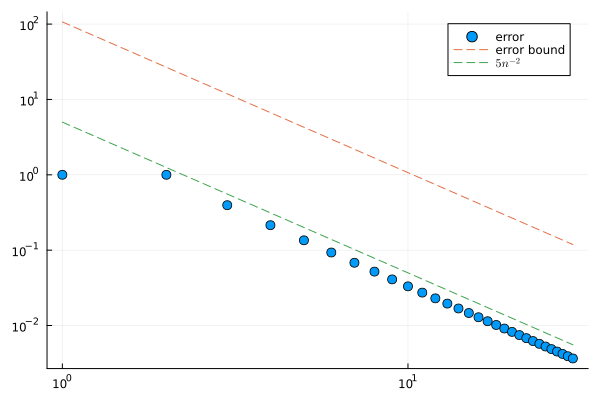

In [6]:
scatter( abs.(T .- (π -1)), xaxis=:log, yaxis=:log, markersize=5, label="error" )
plot!( (1/12)*d2f_max*(b-a)^3*(1:N).^(-2), linestyle=:dash, label="error bound" )
plot!( 5*(1:N).^(-2), linestyle=:dash, label=L"5n^{-2}" )  

We can see here that the error decays with rate $O(n^{-2})$ and the error bound (proved above) is in fact an upper bound!

## Simpson

The next simplest rule of this kind is taking $X = \{a, \frac{a+b}{2}, b\}$ and considering the polynomial interpolation $p_2$ of degree $2$: 

\begin{align}
    \int_a^b f(x) \approx \int_a^b p_2(x) = \frac{b-a}{6} \left[ f(a) + 4 f\big(\tfrac{a+b}{2}\big) + f(b) \right].
\end{align}

Here, you can either write out the polynomial interpolation using the Lagrange polynomials and evaluate the weights $w_j = \int_a^b \ell_j$ explicitly, or you may notice that this rule is of the form $w_0 f(a) + w_1 f(\tfrac{a+b}{2}) + w_2 f(b)$ and is exact if $f$ is a polynomial of degree $2$ (because $p_2 = f$ in this case). Therefore, in particular, we must have

\begin{align}
    \int_a^b 1 = b-a &= w_0  + w_1  + w_2 \nonumber\\
    \int_a^b x = \frac{b - a}{2} (a+b) &= w_0 a + w_1 \frac{a+b}{2} + w_2 b  \nonumber\\
    \int_a^b x^2 = \frac{b-a}{3}(a^2 + ab + b^2) &= w_0 a^2 + w_1 \left(\frac{a+b}{2}\right)^2 + w_2 b^2. 
\end{align}

And you may solve this system of equations for $w_0, w_1, w_2$ (I will leave out the details of this calculation).

***Error Estimate.*** Since $p_2$ is a degree zero interpolating polynomial, we may apply the error bound we had for interpolation: 

\begin{align}
    f(x) - p_2(x) = \frac{f'''(\xi_x)}{3!} (x - a)\big( x - \tfrac{a+b}{2} \big) (x-b) 
\end{align}

for some $\xi_x \in [a, b]$. Therefore, integrating this over $[a,b]$, we have the bound

\begin{align}
    \left| \int_{a}^b \big[ f(x) - p_2(x) \big] \mathrm{d}x \right| 
    %
    &\leq \frac{\| f'''\|_{L^\infty([a,b])}}{6} \int_a^b |(x - a)\big( x - \tfrac{a+b}{2} \big) (x-b)| \mathrm{d}x \nonumber\\
    &\leq \frac{\| f'''\|_{L^\infty([a,b])}}{6} \frac{(b-a)^4}{36}.
\end{align}

***Composite Rule.*** This error bound is only useful if $[a,b]$ is a small interval (or $f'''$ is small). It therefore makes sense to split the interval $[a,b]$ into subintervals and consider the Simpson rule on each one. We will now consider $n$ even and $x_j = a + j\frac{b-a}{n}$ for $j = 0,\dots,n$ and write

\begin{align}
    \int_a^b f &= \sum_{j=0 : \text{ even}}^{n-2} \int_{x_j}^{x_{j+2}} f \nonumber\\
    %
    &\approx \sum_{j=0 : \text{ even}}^{n-2} \frac{x_{j+2} - x_j}{6} \big[ f(x_j) + 4 f(x_{j+1}) + f(x_{j+2}) \big] \nonumber\\
    %
    &= \frac{b-a}{3n} \left[  f(x_0) + 4 f(x_{1}) + 2 f(x_{2}) + 4 f(x_3) + 2 f(x_{4}) + \dots + 4 f(x_{n-1}) + f(x_n) \right]
\end{align}

(we have changed notation here slightly so that we are interpolating $f$ only at points in $X = \{x_0, \dots, x_n\}$). This is a quadrature rule with weights $w_0 = w_n = \frac{x_{n} - x_{n-2}}{6} = \frac{b-a}{3 n}$, and $w_{2j+1} = \frac{b-a}{3n} \cdot 4$ and $w_{2j} = \frac{b-a}{3n} \cdot 2$ otherwise. Using the error estimate and summing over $j$, we obtain

\begin{align}
    \left| \int_a^b f - \sum_{j = 0}^n w_j f(x_j) \right| &\leq  \| f'''\|_{L^\infty([a,b])} \sum_{j=0 : \text{ even}}^{n-2} \frac1{6^3} \left(2 \cdot \frac{b-a}{n}\right)^4 \nonumber\\
    %
    &\leq  \frac{\| f'''\|_{L^\infty([a,b])}}{27} \frac{(b-a)^4}{n^3} \nonumber\\
\end{align}


***Remark.*** Notice that this quadrature rule is exact if $f$ is a polynomial of degree $2$.

***Numerics.*** We now test this numerically:

[ Info: Saved animation to c:\Users\math5\Math 5485\Pictures\Simpson.gif


Plots.AnimatedGif("c:\\Users\\math5\\Math 5485\\Pictures\\Simpson.gif")
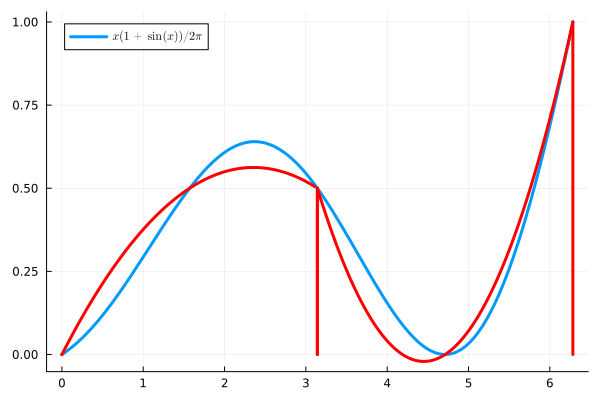

In [7]:
N = 15
S = []

anim = @animate for n ∈ 1:N
    
    h = (b-a)/(2*n)
    x = [a + j*(b-a)/(2*n) for j in 0:(2*n)]
    
    p = 0
    for j in 0:2*n
        if j==0
            p = p + f( x[j+1] )
        elseif j==2*n 
            p = p + f( x[j+1] )
        elseif mod(j,2)==0
            p = p + 2*f( x[j+1] )
        else
            p = p + 4*f( x[j+1] )
        end
    end
    push!( S, h*p/3 )
    
    plot( f, a, b, label=L"x( 1 + \sin(x) )/2π", lw = 3)

    push!(x, b)
    for m ∈ 1:2n 

        p = fit( [x[m], (x[m]+x[m+1])/2, x[m+1]], [f(x[m]), f((x[m]+x[m+1])/2), f(x[m+1])] )

        plot!( p, x[m], x[m+1], lw=3, color="red", primary=false)
        plot!([x[m], x[m]], [0, f(x[m])], lw=3, color="red", primary=false)
        plot!([x[m+1], x[m+1]], [0, f(x[m+1])], lw=3, color="red", primary=false)
    end

end

gif(anim, "Pictures/Simpson.gif", fps = 1)

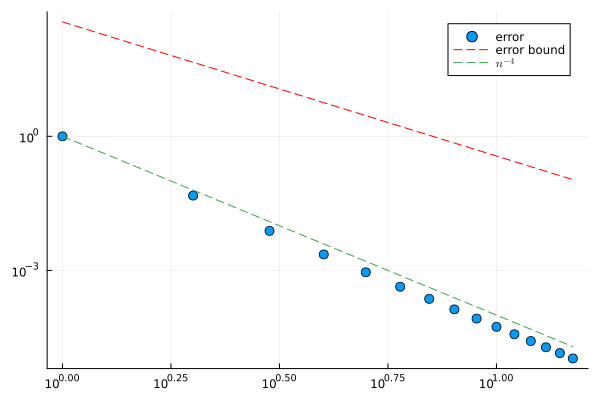

In [8]:
scatter( abs.(S .- (π -1)), xaxis=:log, yaxis=:log, markersize=5, label="error")
plot!( (1/(27))*d3f_max*(b-a)^4*(1:N).^(-3), linestyle=:dash, color=:red, label="error bound" )
plot!( (1:N).^(-4), linestyle=:dash, label=L"n^{-4}" )
# plot!( (1/2880)*d4f_max*(b-a)^5*(1:N).^(-4), linestyle=:dash, label="n^{-4}" )

Therefore the error bound we have derived is an upper bound in this case! However, it seems that the error is $O(n^{-4})$ not $O(n^{-3})$ (which is what our error bound says). We will see now that we actually get an improved error bound:

Recall that we are considering the (composite) Simpson rule: 

\begin{align}
    \int_a^b f &\approx \sum_{j=0 : \text{ even}}^{n-2} \frac{b-a}{3n} \big[ f(x_j) + 4 f(x_{j+1}) + f(x_{j+2}) \big]
\end{align}

(with $n$ even). We have seen that the quadrature rule is exact when $f$ is a quadratic polynomial (degree 2). We will now see that it is also exact when $f$ is a cubic polynomial (degree 3).

*Proof.* We may write $f(x) = \alpha \big( x - \tfrac{a+b}{2} \big)^3  +  g(x)$ where $g$ is a quadratic polynomial. Since $t \mapsto t^3$ is an odd function, we have 

\begin{align}
   0 = \int_{a}^{b} \big( x - \tfrac{a+b}{2} \big)^3 \mathrm{d}x
    %
    = \frac{b-a}{6} \big[ \big( a - \tfrac{a+b}{2} \big)^3 + 4 \big(  \tfrac{a+b}{2}  - \tfrac{a+b}{2} \big)^3 +  \big( b - \tfrac{a+b}{2} \big)^3 \big]
\end{align}

and thus 

\begin{align}
    \int_{a}^b f &= \int_{a}^b \Big[ \alpha \big( x - \tfrac{a+b}{2} \big)^3  +  g(x) \Big] \mathrm{d}t \nonumber\\
    %
    &= 0 + \frac{b-a}{6} \big[ g(a) + 4 g\big(\tfrac{a+b}{2}\big) + g(b) \big] \nonumber\\
    %
    &= \frac{b-a}{6} \big[ f(a) + 4 f\big(\tfrac{a+b}{2}\big) + f(b) \big].
\end{align}

As a result, Simpson's quadrature rule is exact for all cubic functions. The composite rule is the sum of Simpson's rule on each subinterval and so this is also exact on polynomials of degree $3$. $\square$

We now turn our attention to error estimates. Let $p$ be the (degree less than or equal to $3$) Hermite polynomial interpolation of $f$ on $\{\{ a, b, \tfrac{a+b}2, \tfrac{a+b}2 \}\}$. Then, using the errror estimates for Hermite interpolation, there exists $\xi_x \in [a,b]$ such that

\begin{align}
    \left| \int_a^b f - \frac{b-a}{6} \big[ f(a) + 4 f\big(\tfrac{a+b}{2}\big) + f(b) \big] \right|
    %
    &= \left| \int_a^b f - \frac{b-a}{6} \big[ p(a) + 4 p\big(\tfrac{a+b}{2}\big) + p(b) \big] \right| \nonumber\\
    %
    &= \left| \int_a^b \big( f - p \big) \right| \nonumber\\
    %
    &= \left| \int_a^b \frac{f''''(\xi_x)}{4!} (x-a)\big( x - \tfrac{a+b}2 \big)^2 (x-b) \mathrm{d}x \right| \nonumber\\
    %
    &\leq \frac{\| f'''' \|_{L^\infty([a,b])}}{4!} \left| \int_a^b (x-a)\big( x - \tfrac{a+b}2 \big)^2 (x-b) \mathrm{d}x \right| \nonumber\\
    %
    &= \frac{\| f'''' \|_{L^\infty([a,b])}}{4!} \frac{(b-a)^5}{120}
\end{align}

Here, we have used the fact that $x \to (x-a)\big( x - \tfrac{a+b}2 \big)^2 (x-b)$ doesn't change sign on $[a,b]$. Then, the error estimate for the composite rule is bounded above as follows:

\begin{align}
    &\left| \int_a^b f - \frac{b-a}{3n} \sum_{j=0 : \text{ even}}^{n-2} \big[ f(x_j) + 4 f(x_{j+1}) + f(x_{j+2}) \big] \right| \nonumber\\
    %
    &\leq \sum_{j=0 : \text{ even}}^{n-2} \left| \int_{x_j}^{x_{j+2}} f - \frac{x_{j+2}-x_{j}}{6} \big[ f(x_j) + 4 f\big(x_{j+1}\big) + f(x_{j+2}) \big] \right| \nonumber\\
    %
    &\leq \frac{\| f'''' \|_{L^\infty([a,b])}}{4!} \frac{n}{2} \frac{1}{120} \left(2\frac{b-a}{n}\right)^5
    %
    \leq \frac{\| f'''' \|_{L^\infty([a,b])}}{180} \frac{(b-a)^5}{n^4}
\end{align}

This gives us the correct rate:

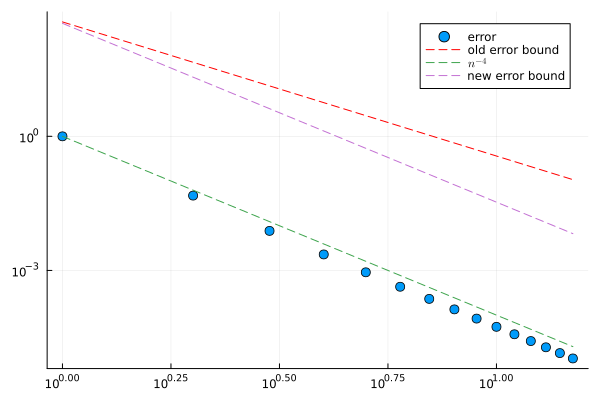

In [9]:
scatter( abs.(S .- (π -1)), xaxis=:log, yaxis=:log, markersize=5, label="error")
plot!( (1/(27))*d3f_max*(b-a)^4*(1:N).^(-3), linestyle=:dash, color=:red, label="old error bound" )
plot!( (1:N).^(-4), linestyle=:dash, label=L"n^{-4}" )
plot!( (1/180)*d4f_max*(b-a)^5*(1:N).^(-4), linestyle=:dash, label="new error bound" )

## Summary:

1. Rectangular rule is given by $(b-a) f(a)$ and leads to a composite rule with error $C \|f'\|_{L^\infty([a,b])} n^{-1}$,
2. Trapezium rule is given by $\frac{b-a}{2} \left( f(a) + f(b) \right)$ and leads to a composite rule with error $C \|f''\|_{L^\infty([a,b])} n^{-2}$,
3. Simpson rule is given by $\frac{b-a}{6} \left( f(a) + 4 f(\tfrac{a+b}2) + f(b) \right)$ and leads to a composite rule with error $C \|f''''\|_{L^\infty([a,b])} n^{-4}$,